In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carsforsale/cars_raw.csv


AVERAGE CAR RELIABILITY RATING PER STATE
Calculated based on data from Cars.com
Ratings are based on a traditional scale from 1.0 to 5.0.

Sorted by A-Z -------
- AK: 4.8 (1 rating)
- AL: 4.774999999999999 (72 ratings)
- AR: 4.670731707317077 (41 ratings)
- AZ: 4.675581395348846 (344 ratings)
- CA: 4.580988023952118 (668 ratings)
- CO: 4.641772151898725 (158 ratings)
- CT: 4.735353535353532 (99 ratings)
- DE: 4.661538461538461 (13 ratings)
- FL: 4.682657657657712 (888 ratings)
- GA: 4.604336734693891 (392 ratings)
- HI: 4.7562500000000005 (16 ratings)
- IA: 4.705714285714287 (35 ratings)
- ID: 4.753571428571429 (28 ratings)
- IL: 4.650421585160212 (593 ratings)
- IN: 4.6644808743169275 (183 ratings)
- KS: 4.706172839506173 (81 ratings)
- KY: 4.696202531645571 (79 ratings)
- LA: 4.694117647058827 (51 ratings)
- MA: 4.741562500000003 (320 ratings)
- MD: 4.714241486068119 (323 ratings)
- ME: 4.825 (8 ratings)
- MI: 4.6805970149253735 (268 ratings)
- MN: 4.728947368421037 (228 ratings)
- M

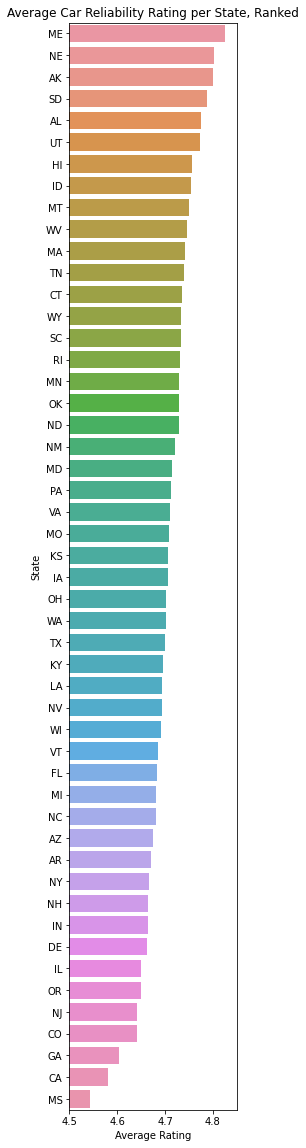

In [2]:
import csv
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

with open("../input/carsforsale/cars_raw.csv", "r") as cars_for_sale_csv:

    #Convert raw data file (csv) into something more usable (list of dictionaries)
    cars_for_sale_dict_list = csv.DictReader(cars_for_sale_csv)

    #Create unsorted list with only each car's state and reliability rating
    unsorted_narrowed_list = []
    for dict in cars_for_sale_dict_list:
        unsorted_narrowed_list.append([dict["State"], dict["ReliabilityRating"]])

    #Sort the narrowed list with Python sorted()
    sorted_narrowed_list = sorted(unsorted_narrowed_list)

    current_state = ""
    each_states_reliability_ratings = []
    state_number = -1

    #Create a list of 50 lists (each_states_reliability_ratings) each containing a state code and a list of all reliability ratings from all cars sold from that state
    for car in range(len(sorted_narrowed_list)):
        car_in_list = sorted_narrowed_list[car]
        car_state = car_in_list[0]
        if car_state != current_state:
            current_state = car_state
            state_number += 1
            current_reliability_ratings = []
            current_reliability_ratings.append(float(car_in_list[1]))
            each_states_reliability_ratings.append([current_state, current_reliability_ratings])
        else:
            current_reliability_ratings.append(float(car_in_list[1]))
            each_states_reliability_ratings[state_number][1] = current_reliability_ratings

    state_counter = 0

    print("AVERAGE CAR RELIABILITY RATING PER STATE")
    print("Calculated based on data from Cars.com")
    print("Ratings are based on a traditional scale from 1.0 to 5.0.")
    print()

    #Find the average reliability rating of each state and append this value to each list contained in the 50-list list (each_states_reliability_ratings)
    print("Sorted by A-Z -------")
    for state in each_states_reliability_ratings:
        one_states_reliability_ratings = state[1]
        rating_sum = 0.0
        for rating in one_states_reliability_ratings:
            rating_sum += rating
        rating_average = rating_sum / len(one_states_reliability_ratings)
        state.append(rating_average)

        #Print each state's average reliability rating by alphabetical order and the number of ratings per state
        if len(state[0]) == 2 and state[0] != "RT" and state[0] != "SE":
            state_counter += 1
            if len(one_states_reliability_ratings) == 1:
                print("- " + state[0] + ": " + str(state[2]) + " (" + str(len(one_states_reliability_ratings)) + " rating)")
            else:
                print("- " + state[0] + ": " + str(state[2]) + " (" + str(len(one_states_reliability_ratings)) + " ratings)")

    print()

    #Create a new sorted list (new_each_states_reliability_ratings) containing the average, a state code, and a list of all reliability ratings from all cars sold from that state (in this order)
    print("Sorted by Highest to Lowest -------")
    new_each_states_reliability_ratings = sorted(each_states_reliability_ratings)
    for state in new_each_states_reliability_ratings:
        state.append(state[0])
        state.remove(state[0])
        state.append(state[0])
        state.remove(state[0])

    #Order this list by highest rating to lowest rating with Python .sort(reverse=True)
    new_each_states_reliability_ratings.sort(reverse=True)

    state_counter = 0

    #Print each state's average reliability rating by rank (highest rating to lowest rating) and the number of ratings per state
    for state in new_each_states_reliability_ratings:
        if len(state[1]) == 2 and state[1] != "RT" and state[1] != "SE":
            if len(state[2]) == 1:
                state_counter += 1
                print(str(state_counter) + ". " + state[1] + ": " + str(state[0]) + " (" + str(len(state[2])) + " rating)")
            else:
                state_counter += 1
                print(str(state_counter) + ". " + state[1] + ": " + str(state[0]) + " (" + str(len(state[2])) + " ratings)")

    print()

    #Print the number of states represented in both lists (sorted by A-Z and by rank)
    print("States represented: " + str(state_counter))
    
    #Create a list of dictonaries representing each state's reliability averages
    state_and_reliability_average_dict_list = []
    for state in range(len(new_each_states_reliability_ratings)):
        if len(new_each_states_reliability_ratings[state][1]) == 2 and new_each_states_reliability_ratings[state][1] != "RT" and new_each_states_reliability_ratings[state][1] != "SE":
            new_dict = {"state": new_each_states_reliability_ratings[state][1], "reliabilityAverage": new_each_states_reliability_ratings[state][0], "nRatings": len(new_each_states_reliability_ratings[state][2])}
            state_and_reliability_average_dict_list.append(new_dict)
    
    dataframe = pd.DataFrame(state_and_reliability_average_dict_list)
    
    #Convert the list of dictionaries into a .csv file
    state_and_reliability_average_csv = dataframe.to_csv("Average_Car_Reliability_Rating_Per_State.csv")
    
    #Output the .csv file
    bar_graph_data = pd.read_csv("/kaggle/working/Average_Car_Reliability_Rating_Per_State.csv", index_col="state")
    bar_graph_data
    
    #Set width and height of bar graph
    plt.figure(figsize=(3,20))

    #Add graph title
    plt.title("Average Car Reliability Rating per State, Ranked")

    #Bar graph representation
    bar_graph = sns.barplot(x=bar_graph_data["reliabilityAverage"], y=bar_graph_data.index)
    bar_graph.set_xlim(4.50, 4.85)

    #Add labels for both axes
    plt.xlabel("Average Rating")
    plt.ylabel("State")
    
    bar_graph_image = plt.savefig("ACRRPS_graph.png")
    bar_graph_image